In [633]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

from pickle import dump
from pickle import load

%matplotlib inline

# function that get source and destination
pass parameter of index = 0 to get source pass index = 1 to get destination

In [634]:
def getCity(value,index):
    return value.split(',')[index].split(': ')[1].split("'")[1]

In [635]:
def getDistance(value):
    source = getCity(value,0)
    destination = getCity(value,1)
    index1 = cities.index(source)
    index2 = cities.index(destination)
    return distanceKm((latitude[index1],longitude[index1]),(latitude[index2],longitude[index2]))


In [636]:
def distanceKm(loc1,loc2):
    from haversine import haversine, Unit
    source = (loc1[0], loc1[1]) # (lat, lon)
    destination = (loc2[0], loc2[1])
    return haversine(source, destination)

# Check weekend Or Not 

In [637]:
def isWeekEndOrNot(day):
    if(day == 'Saturday' or day == 'Monday'):
        return 1
    return 0 

# Function get location by name of city 

In [638]:
longitude = []
latitude = []
   
def findLocation(city):
    try:
        geolocator = Nominatim(user_agent="airline")
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findLocation(city)    

# Function Returns Number of stops

In [639]:
def retrnNumberOfStops(x):
    if(x[0] == 'n'):
        return 0
    else: 
        return int(x[0])

# Handling Time Taking 

In [640]:
def handlingTimeTaken(x):
    hours=""
    index = 0
    minutes =""
    for i in range(0,len(x)):
        if(x[i] == 'h'):
            index = i 
            hours = x[:i]
            break
    for i in range(0,len(x)):
        if(x[i]=='m'):
            minutes = x[index + 2:i]
            break
    allTimes = ""
    if (minutes == ""):
        allTime = hours
    else:
        minutes = str(int(minutes) / 60)
        allTime=  hours + (minutes[1:])
    return float(allTime)

# Function Specify your top n features you want to visualize.

In [641]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# You can also discard the abs() function 
# if you are interested in negative contribution of features

# Reading Data

In [642]:
df = pd.read_csv('airline-price-classification.csv')

In [643]:
df.head()

,date,airline,ch_code,num_code,dep_time,time_taken,stop,arr_time,type,route,TicketCategory
0,5/3/2022,Vistara,UK,812,9:45,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,business,"{'source': 'Bangalore', 'destination': 'Hydera...",very expensive
1,18-03-2022,Vistara,UK,975,5:45,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:15,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",very expensive
2,9/3/2022,GO FIRST,G8,7537,14:30,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:40,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",cheap
3,15-03-2022,GO FIRST,G8,287,10:40,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:20,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",moderate
4,22-03-2022,Vistara,UK,826,12:30,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",moderate


In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240208 entries, 0 to 240207
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            240208 non-null  object
 1   airline         240208 non-null  object
 2   ch_code         240208 non-null  object
 3   num_code        240208 non-null  int64 
 4   dep_time        240208 non-null  object
 5   time_taken      240208 non-null  object
 6   stop            240208 non-null  object
 7   arr_time        240208 non-null  object
 8   type            240208 non-null  object
 9   route           240208 non-null  object
 10  TicketCategory  240208 non-null  object
dtypes: int64(1), object(10)
memory usage: 20.2+ MB


In [645]:
df.isnull().sum()

date              0
airline           0
ch_code           0
num_code          0
dep_time          0
time_taken        0
stop              0
arr_time          0
type              0
route             0
TicketCategory    0
dtype: int64

In [646]:
df.describe()

,num_code
count,240208.000000
mean,1422.222903
std,1980.788784
min,101.000000
25%,637.000000
50%,818.000000
75%,927.000000
max,9991.000000


In [647]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'time_taken',
       'stop', 'arr_time', 'type', 'route', 'TicketCategory'],
      dtype='object')

In [648]:
import datetime
dt = df['date']
days = []
for i in dt:
    if('/' in i):
        day, month, year = (int(x) for x in i.split('/'))
        ans = datetime.date(year, month, day)
        days.append(ans.strftime("%A"))
    else:
        day, month, year = (int(x) for x in i.split('-'))
        ans = datetime.date(year, month, day)
        days.append(ans.strftime("%A"))
df['Days'] = days
print(df['Days'])

0          Saturday
1            Friday
2         Wednesday
3           Tuesday
4           Tuesday
            ...    
240203       Friday
240204      Tuesday
240205    Wednesday
240206       Friday
240207       Friday
Name: Days, Length: 240208, dtype: object


In [649]:
df['Day'] = pd.to_datetime(df['date']).dt.day

In [650]:
df['Month'] = pd.to_datetime(df['date']).dt.month

In [651]:
df['stop'] = df['stop'].apply(retrnNumberOfStops)
df['stop']

0         1
1         1
2         1
3         1
4         1
         ..
240203    1
240204    1
240205    0
240206    1
240207    1
Name: stop, Length: 240208, dtype: int64

In [652]:
df['time_taken'] = df['time_taken'].apply(handlingTimeTaken)
df['time_taken']

0         10.166667
1          6.500000
2          8.166667
3          9.666667
4          7.416667
            ...    
240203     9.416667
240204    17.333333
240205     2.916667
240206    28.250000
240207    19.500000
Name: time_taken, Length: 240208, dtype: float64

# Applay this function to get column of source and distination    

In [653]:
df['source'] = df['route'].apply(getCity,args=[0])
df['destination'] = df['route'].apply(getCity,args=[1])

# get unique of cities 

In [654]:
cities = list(pd.concat([df['source'], df['destination']]).unique())

In [655]:
#pip install geopy

In [656]:
for i in cities:  
    if findLocation(i) != None:
        loc = findLocation(i)
        longitude.append(loc.longitude)
        latitude.append(loc.latitude)   
        
        print(f"city of {i} \n latitude: {loc.latitude}\n longitude: {loc.longitude}")
        print("*"*30)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

city of Bangalore 
 latitude: 12.9767936
 longitude: 77.590082
******************************
city of Delhi 
 latitude: 28.6517178
 longitude: 77.2219388
******************************
city of Mumbai 
 latitude: 19.0759899
 longitude: 72.8773928
******************************
city of Chennai 
 latitude: 13.0836939
 longitude: 80.270186
******************************
city of Hyderabad 
 latitude: 17.360589
 longitude: 78.4740613
******************************
city of Kolkata 
 latitude: 22.5414185
 longitude: 88.35769124388872
******************************


In [657]:
df['distance'] = df['route'].apply(getDistance)

In [658]:
df = df.drop(['route','num_code','dep_time','arr_time'],axis=1)

In [659]:
df['Weekends'] = df['Days'].apply(isWeekEndOrNot)
df['Weekends']

0         1
1         0
2         0
3         0
4         0
         ..
240203    0
240204    0
240205    0
240206    0
240207    0
Name: Weekends, Length: 240208, dtype: int64

In [660]:
df.head()

,date,airline,ch_code,time_taken,stop,type,TicketCategory,Days,Day,Month,source,destination,distance,Weekends
0,5/3/2022,Vistara,UK,10.166667,1,business,very expensive,Saturday,3,5,Bangalore,Hyderabad,496.597100,1
1,18-03-2022,Vistara,UK,6.500000,1,business,very expensive,Friday,18,3,Delhi,Hyderabad,1262.009188,0
2,9/3/2022,GO FIRST,G8,8.166667,1,economy,cheap,Wednesday,3,9,Mumbai,Hyderabad,621.089378,0
3,15-03-2022,GO FIRST,G8,9.666667,1,economy,moderate,Tuesday,15,3,Mumbai,Delhi,1152.469723,0
4,22-03-2022,Vistara,UK,7.416667,1,economy,moderate,Tuesday,22,3,Chennai,Kolkata,1355.257062,0


# Some Visuaization 

In [661]:
df['TicketCategory'].unique()

array(['very expensive', 'cheap', 'moderate', 'expensive'], dtype=object)

<AxesSubplot:ylabel='type'>

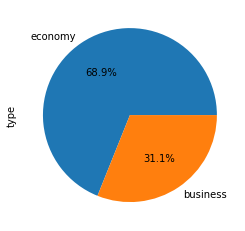

In [662]:
round((df["type"].value_counts()/df.shape[0])*100,2).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='ch_code'>

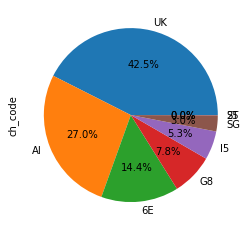

In [663]:
round((df["ch_code"].value_counts()/df.shape[0])*100,2).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='TicketCategory'>

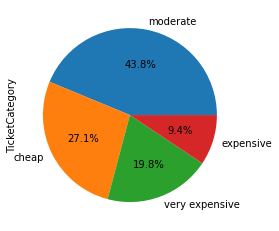

In [664]:
round((df["TicketCategory"].value_counts()/df.shape[0])*100,2).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Weekends'>

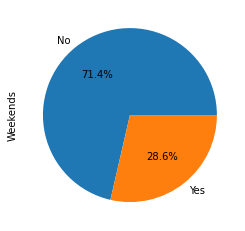

In [665]:
round((df["Weekends"].value_counts()/df.shape[0])*100,2).plot.pie(
        autopct='%1.1f%%',labels=["No","Yes"])

<AxesSubplot:ylabel='Days'>

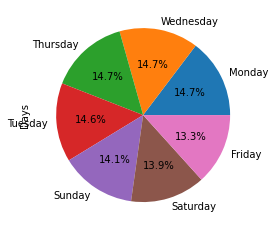

In [666]:
round((df["Days"].value_counts()/df.shape[0])*100,2).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Month'>

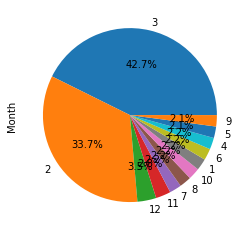

In [667]:
round((df["Month"].value_counts()/df.shape[0])*100,2).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='stop'>

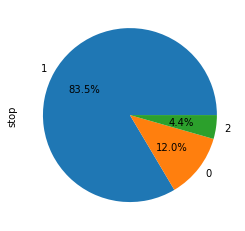

In [668]:
round((df["stop"].value_counts()/df.shape[0])*100,2).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='source'>

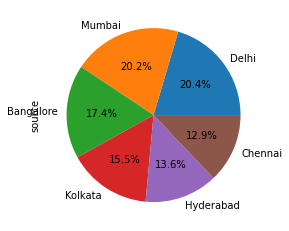

In [669]:
round((df["source"].value_counts()/df.shape[0])*100,2).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='destination'>

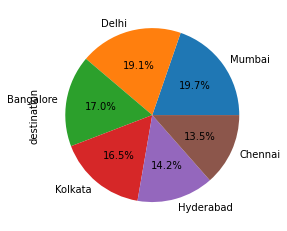

In [670]:
round((df["destination"].value_counts()/df.shape[0])*100,2).plot.pie(autopct='%1.1f%%')

In [671]:
df["TicketCategory"].unique()

array(['very expensive', 'cheap', 'moderate', 'expensive'], dtype=object)

# Lable Encoding

In [672]:
les = {}
for i in (["type","airline","ch_code","source","destination","TicketCategory","Days"]) :
    les[i] = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
    df[i] = les[i].fit_transform(np.array(df[i]).reshape(-1,1)) 

In [673]:
df["TicketCategory"].unique()

array([3., 0., 2., 1.])

In [674]:
df.head()

,date,airline,ch_code,time_taken,stop,type,TicketCategory,Days,Day,Month,source,destination,distance,Weekends
0,5/3/2022,7.0,7.0,10.166667,1,0.0,3.0,2.0,3,5,0.0,3.0,496.597100,1
1,18-03-2022,7.0,7.0,6.500000,1,0.0,3.0,0.0,18,3,2.0,3.0,1262.009188,0
2,9/3/2022,2.0,3.0,8.166667,1,1.0,0.0,6.0,3,9,5.0,3.0,621.089378,0
3,15-03-2022,2.0,3.0,9.666667,1,1.0,2.0,5.0,15,3,5.0,2.0,1152.469723,0
4,22-03-2022,7.0,7.0,7.416667,1,1.0,2.0,5.0,22,3,1.0,4.0,1355.257062,0


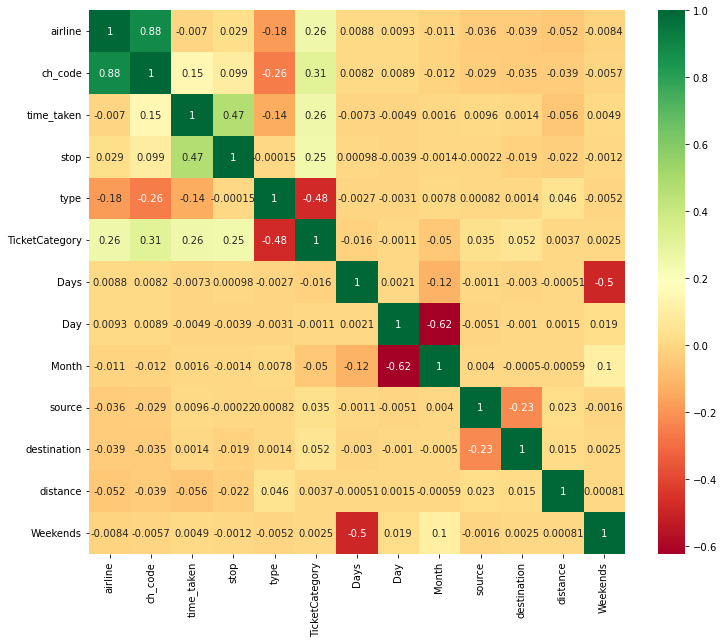

In [675]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [676]:
df.columns

Index(['date', 'airline', 'ch_code', 'time_taken', 'stop', 'type',
       'TicketCategory', 'Days', 'Day', 'Month', 'source', 'destination',
       'distance', 'Weekends'],
      dtype='object')

In [677]:
df = df.drop(['date'],  axis='columns')

In [678]:
X = df.drop('TicketCategory', axis='columns')
y = df.TicketCategory

In [679]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [680]:
scaler = MinMaxScaler()

In [681]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [682]:
dump(scaler, open('minmaxScaler.pkl', 'wb'))

In [683]:
print(X_train.shape)
print(X_test.shape)

(192166, 12)
(48042, 12)


In [684]:
features_names = ['airline', 'time_taken', 'stop', 'type', 'source', 'destination', 'Month',
       'distance', 'Weekends','ch_code']

# Model builiding

# Naive Bayes Algorthim

In [685]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [686]:
nb.predict(X_test)

array([0., 3., 0., ..., 3., 3., 0.])

In [687]:
nb.score(X_train,y_train)

0.4734240188170644

In [688]:
nb.score(X_test,y_test)

0.4788934682153116

In [689]:
error = abs(round(nb.score(X_test, y_test) - nb.score(X_train, y_train), 2))
error

0.01

In [690]:
 ytest_pred_nb = nb.predict(X_test)

In [691]:
ytrain_pred_nb = nb.predict(X_train)

In [692]:
metrics.accuracy_score(y_test,ytest_pred_nb)

0.4788934682153116

In [693]:
conf_mat_nb =confusion_matrix(y_test,ytest_pred_nb)
conf_mat_nb

array([[13052,     0,     0,     0],
       [   14,   438,     0,  3987],
       [19899,   846,     0,    96],
       [    0,   193,     0,  9517]], dtype=int64)

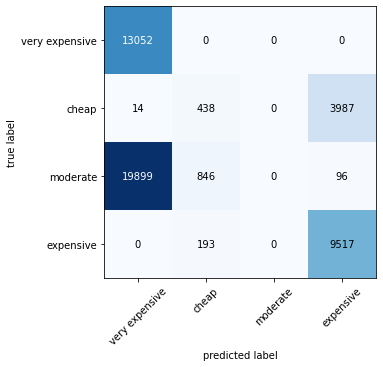

In [694]:
plot_confusion_matrix(conf_mat_nb,class_names=["very expensive","cheap","moderate","expensive"],figsize=(12,5)); #fn

In [695]:
dump(nb, open('naiveBoost.pkl', 'wb'))

In [696]:
## VotingClassifier

# Logistic Regresssion Model 

In [697]:
from sklearn.linear_model import LogisticRegression

In [698]:
log = LogisticRegression()

In [699]:
log.fit(X_train,y_train)

C:\Users\Emad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [700]:
log.score(X_train,y_train)

0.6865106210255716

In [701]:
log.score(X_test , y_test)

0.6896465592606469

In [702]:
error = abs(round(log.score(X_test, y_test) - log.score(X_train, y_train), 2))
error

0.0

In [703]:
ytest_pred_log = log.predict(X_test)

In [704]:
ytrain_pred_log = log.predict(X_train)

In [705]:
metrics.accuracy_score(y_test,ytest_pred_log)

0.6896465592606469

In [706]:
conf_mat_log =confusion_matrix(y_test,ytest_pred_log)
conf_mat_log

array([[ 5901,     0,  7151,     0],
       [    4,   918,   318,  3199],
       [ 2943,    98, 17727,    73],
       [    0,  1118,     6,  8586]], dtype=int64)

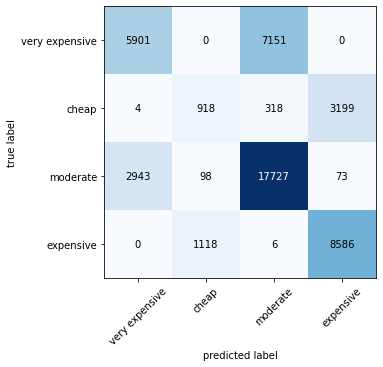

In [707]:
plot_confusion_matrix(conf_mat_log,class_names=["very expensive","cheap","moderate","expensive"],figsize=(12,5)); #fn

In [708]:
dump(log, open('Logistic.pkl', 'wb'))

# KNN Algorthim

In [709]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [710]:
knn.predict(X_test)

array([2., 3., 2., ..., 3., 1., 2.])

In [711]:
knn.score(X_train,y_train)

0.8836630829595246

In [712]:
knn.score(X_test,y_test)

0.8369135339910911

In [713]:
error = abs(round(knn.score(X_test, y_test) - knn.score(X_train, y_train), 2))
error

0.05

In [714]:
ytest_pred_knn = knn.predict(X_test)

In [715]:
ytrain_pred_knn = knn.predict(X_train)

In [716]:
metrics.accuracy_score(y_test,ytest_pred_knn)

0.8369135339910911

In [717]:
metrics.confusion_matrix (y_test,ytest_pred_knn)

array([[10682,     0,  2370,     0],
       [    1,  2636,    85,  1717],
       [ 2407,   158, 18243,    33],
       [    0,  1056,     8,  8646]], dtype=int64)

In [718]:
conf_mat_knn =confusion_matrix(y_test,ytest_pred_knn)
conf_mat_knn

array([[10682,     0,  2370,     0],
       [    1,  2636,    85,  1717],
       [ 2407,   158, 18243,    33],
       [    0,  1056,     8,  8646]], dtype=int64)

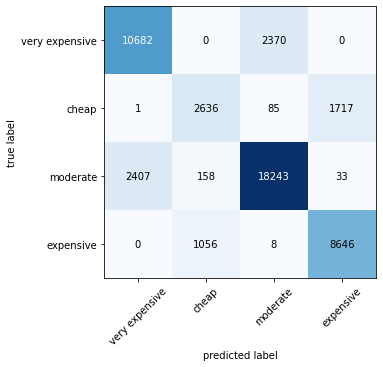

In [719]:
plot_confusion_matrix(conf_mat_knn,class_names=["very expensive","cheap","moderate","expensive"],figsize=(12,5)); #fn

In [720]:
dump(knn, open('knn.pkl', 'wb'))

# Decision Tree Classifier

In [721]:
from sklearn.tree import DecisionTreeClassifier

In [722]:
dtc = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)

In [723]:
dtc.score(X_train,y_train)

0.9898577271733814

In [724]:
dtc.predict(X_test)

array([2., 3., 2., ..., 3., 1., 2.])

In [725]:
dtc.score(X_test, y_test)

0.9243994837850215

In [726]:
error = abs(round(dtc.score(X_test, y_test) - dtc.score(X_train, y_train), 2))
error

0.07

In [727]:
ytest_pred_dtc = dtc.predict(X_test)

In [728]:
ytrain_pred_dtc = dtc.predict(X_train)

In [729]:
metrics.accuracy_score(y_test,ytest_pred_dtc)

0.9243994837850215

In [730]:
metrics.confusion_matrix (y_test,ytest_pred_dtc)

array([[11738,     0,  1314,     0],
       [    1,  4023,    81,   334],
       [ 1375,   108, 19343,    15],
       [    0,   390,    14,  9306]], dtype=int64)

In [731]:
conf_mat_dtc =confusion_matrix(y_test,ytest_pred_dtc)
conf_mat_dtc

array([[11738,     0,  1314,     0],
       [    1,  4023,    81,   334],
       [ 1375,   108, 19343,    15],
       [    0,   390,    14,  9306]], dtype=int64)

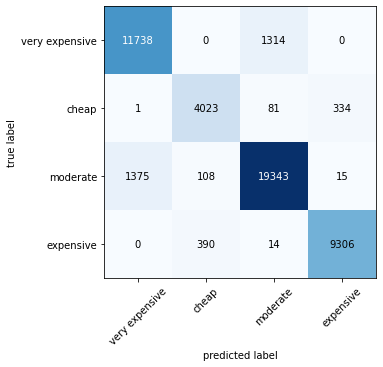

In [732]:
plot_confusion_matrix(conf_mat_dtc,class_names=["very expensive","cheap","moderate","expensive"],figsize=(12,5)); #fn

In [733]:
dump(dtc, open('DecisionTree.pkl', 'wb'))

# XGBoost Classifier

In [734]:
#pip install xgboost

In [735]:
xgb = XGBClassifier(objective= 'binary:logistic', learning_rate=0.9, n_estimators=400, max_depth=5 ,max_leaves= 2,random_state= 45)

In [736]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=2, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=45, reg_alpha=0, ...)

In [737]:
xgb.score(X_train,y_train)

0.970312125974418

In [738]:
xgb.score(X_test,y_test)

0.9444236293243412

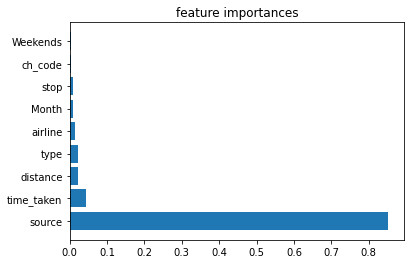

In [739]:
f_importances(abs(xgb.feature_importances_), features_names, top=9)


In [740]:
ytest_pred = xgb.predict(X_test)

In [741]:
ytrain_pred = xgb.predict(X_train)

In [742]:
error = abs(round(xgb.score(X_test, y_test) - xgb.score(X_train, y_train), 4))
error

0.0259

In [743]:
yhat_test = pd.DataFrame(ytest_pred, columns=['Predicted'])

In [744]:
yhat_test

,Predicted
0,2
1,3
2,2
3,3
4,0
...,...
48037,2
48038,2
48039,1
48040,1


In [745]:
conf_mat=confusion_matrix(y_test,ytest_pred)
conf_mat

array([[12179,     0,   873,     0],
       [    0,  4120,    84,   235],
       [ 1053,    64, 19707,    17],
       [    0,   335,     9,  9366]], dtype=int64)

In [746]:
#pip install mlxtend

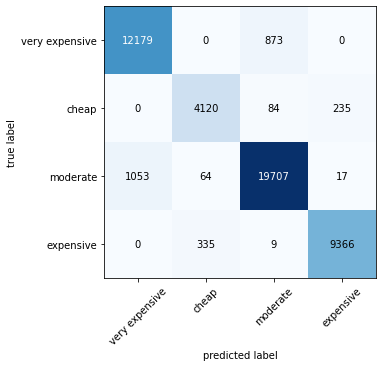

In [747]:
plot_confusion_matrix(conf_mat,class_names=["very expensive","cheap","moderate","expensive"],figsize=(12,5)); #fn

In [748]:
dump(xgb, open('XGB.pkl', 'wb'))

# Gradient Boost Classifier Model

In [823]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2, max_depth=15 , max_features="log2")

In [ ]:
gbc.fit(X_train, y_train)

In [ ]:
gbc.predict(X_test)

In [ ]:
gbc.score(X_train,y_train)

In [ ]:
gbc.score(X_test, y_test)

In [ ]:
error = abs(round(gbc.score(X_test, y_test) - gbc.score(X_train, y_train), 2))
error

In [ ]:
ytest_pred_gbc = gbc.predict(X_test)

In [ ]:
ytrain_pred_gbc = gbc.predict(X_train)

In [ ]:
metrics.accuracy_score(y_test,ytest_pred_gbc)

In [ ]:
conf_mat_gbc =confusion_matrix(y_test,ytest_pred_gbc)
conf_mat_gbc

In [ ]:
plot_confusion_matrix(conf_mat_gbc,class_names=["very expensive","cheap","moderate","expensive"],figsize=(12,5)); #fn

In [ ]:
dump(gbc, open('GBC.pkl', 'wb'))

# Random Forest Classifier

In [749]:
RandomForest = RandomForestClassifier(max_depth=15, random_state=45,max_features=9)

In [750]:
RandomForest.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=9, random_state=45)

In [751]:
RFTrain = RandomForest.predict(X_train)
RFTest = RandomForest.predict(X_test)

In [752]:
metrics.accuracy_score(y_train,RFTrain)

0.9252885526055598

In [753]:
metrics.accuracy_score(y_test,RFTest)

0.9083510261854211

In [754]:
RFconfusion = confusion_matrix(y_test,RFTest)

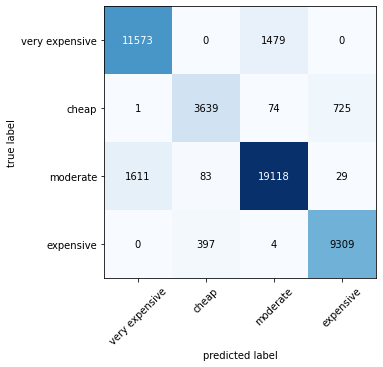

In [755]:
plot_confusion_matrix(RFconfusion,class_names=["very expensive","cheap","moderate","expensive"],figsize=(12,5));

In [756]:
dump(RandomForest, open('RandomForest.pkl', 'wb'))

## AdaaBoost Classifier

In [757]:
AdaBoost=AdaBoostClassifier(n_estimators=100, random_state=45,)

In [758]:
AdaBoost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=45)

In [759]:
AdaTrain = AdaBoost.predict(X_train)

In [760]:
AdaTest = AdaBoost.predict(X_test)

In [761]:
metrics.accuracy_score(y_train,AdaTrain)

0.6242935795093825

In [762]:
metrics.accuracy_score(y_test,AdaTest)

0.6252445776612131

In [763]:
Adaconfusion = confusion_matrix(y_test,AdaTest)

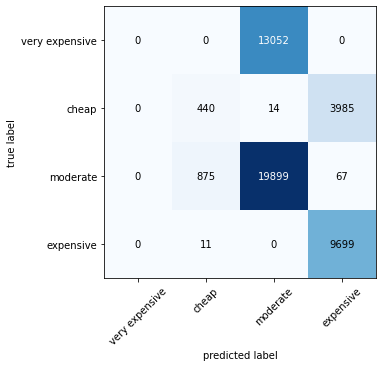

In [764]:
plot_confusion_matrix(Adaconfusion,class_names=["very expensive","cheap","moderate","expensive"],figsize=(12,5));

In [765]:
dump(AdaBoost, open('AdaBoost.pkl', 'wb'))

# Saving Model Pikel 

In [766]:
def dateEdit(df):
    dt = df['date']
    days = []
    for i in dt:
        if('/' in i):
            day, month, year = (int(x) for x in i.split('/'))
            ans = datetime.date(year, month, day)
            days.append(ans.strftime("%A"))
        else:
            day, month, year = (int(x) for x in i.split('-'))
            ans = datetime.date(year, month, day)
            days.append(ans.strftime("%A"))
    df['Days'] = days
    df['Day'] = pd.to_datetime(df['date']).dt.day
    df['Month'] = pd.to_datetime(df['date']).dt.month
    df['Weekends'] = df['Days'].apply(isWeekEndOrNot)

    return df

In [767]:
def HandelSource_Dist_Part (test):
    
    test['stop'] = test['stop'].apply(retrnNumberOfStops)
    test['time_taken'] = test['time_taken'].apply(handlingTimeTaken)
    test['source'] = test['route'].apply(getCity,args=[0])
    test['destination'] = test['route'].apply(getCity,args=[1])
    cities = list(pd.concat([test['source'],test['destination']]).unique())
    for i in cities:  
        if findLocation(i) != None:
            loc = findLocation(i)
            longitude.append(loc.longitude)
            latitude.append(loc.latitude)   

            print(f"city of {i} \n latitude: {loc.latitude}\n longitude: {loc.longitude}")
            print("*"*30)
        else:
            latitude.append(np.nan)
            longitude.append(np.nan)
            
    test['distance'] = test['route'].apply(getDistance)
    return test

In [768]:
def testPreprocessing(test):
    
    test= HandelSource_Dist_Part (test)
    test=test.fillna(test.mode())
    test = dateEdit(test)
    for i in (["type","airline","ch_code","source","destination","TicketCategory","Days"]) :
        test[i] = les[i].transform( np.array(test[i]).reshape(-1,1)) 
    test = test.drop(['route','num_code','dep_time','arr_time','date'], axis='columns')
    return test


# Manual Test On Sample Data Given

In [778]:
test = pd.read_csv('airline-tas-classification-test.csv')

In [779]:
test.isnull().sum()

date              0
airline           0
ch_code           0
num_code          0
dep_time          0
time_taken        0
stop              0
arr_time          0
type              0
route             0
TicketCategory    0
dtype: int64

In [780]:
test.head()

,date,airline,ch_code,num_code,dep_time,time_taken,stop,arr_time,type,route,TicketCategory
0,8/3/2022,Air India,AI,430,9:55,11h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:15,economy,"{'source': 'Chennai', 'destination': 'Mumbai'}",cheap
1,7/3/2022,Indigo,6E,926,18:30,04h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:25,economy,"{'source': 'Delhi', 'destination': 'Mumbai'}",cheap
2,24-03-2022,Indigo,6E,6491,13:05,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,economy,"{'source': 'Bangalore', 'destination': 'Mumbai'}",cheap
3,27-03-2022,Air India,AI,473,18:40,22h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:05,economy,"{'source': 'Delhi', 'destination': 'Bangalore'}",cheap
4,7/3/2022,Indigo,6E,684,21:55,01h 15m,non-stop,23:10,economy,"{'source': 'Bangalore', 'destination': 'Hydera...",cheap


In [781]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            20000 non-null  object
 1   airline         20000 non-null  object
 2   ch_code         20000 non-null  object
 3   num_code        20000 non-null  int64 
 4   dep_time        20000 non-null  object
 5   time_taken      20000 non-null  object
 6   stop            20000 non-null  object
 7   arr_time        20000 non-null  object
 8   type            20000 non-null  object
 9   route           20000 non-null  object
 10  TicketCategory  20000 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB


In [782]:
test['type'].unique()

array(['economy', 'business'], dtype=object)

In [783]:
test = testPreprocessing(test)

city of Chennai 
 latitude: 13.0836939
 longitude: 80.270186
******************************
city of Delhi 
 latitude: 28.6517178
 longitude: 77.2219388
******************************
city of Bangalore 
 latitude: 12.9767936
 longitude: 77.590082
******************************
city of Kolkata 
 latitude: 22.5414185
 longitude: 88.35769124388872
******************************
city of Mumbai 
 latitude: 19.0759899
 longitude: 72.8773928
******************************
city of Hyderabad 
 latitude: 17.360589
 longitude: 78.4740613
******************************


In [784]:
test.head()

,airline,ch_code,time_taken,stop,type,TicketCategory,source,destination,distance,Days,Day,Month,Weekends
0,0.0,2.0,11.333333,1,1.0,0.0,1.0,5.0,1033.009671,5.0,3,8,0
1,3.0,1.0,4.916667,1,1.0,0.0,2.0,5.0,1152.469723,1.0,3,7,1
2,3.0,1.0,7.666667,1,1.0,0.0,0.0,5.0,844.583275,4.0,24,3,0
3,0.0,2.0,22.416667,1,1.0,0.0,2.0,0.0,1743.390651,3.0,27,3,0
4,3.0,1.0,1.250000,0,1.0,0.0,0.0,3.0,496.597100,1.0,3,7,1


In [785]:
test_x = test.drop('TicketCategory' , axis = 'columns')
test_y = test.TicketCategory

In [786]:
testScaler= load(open('minmaxScaler.pkl', 'rb'))
test_x =  testScaler.transform(test_x)

In [787]:
test_x

array([[ 0.        ,  0.28571429,  0.21428571, ...,  0.6       ,
        -0.19236581,  0.        ],
       [ 0.42857143,  0.14285714,  0.08333333, ...,  0.6       ,
        -0.19304655,  1.        ],
       [ 0.42857143,  0.14285714,  0.13945578, ...,  4.8       ,
        -0.19576951,  0.        ],
       ...,
       [ 1.        ,  1.        ,  0.29251701, ...,  4.2       ,
        -0.19645026,  1.        ],
       [ 0.        ,  0.28571429,  0.33673469, ...,  3.4       ,
        -0.19576951,  0.        ],
       [ 1.        ,  1.        ,  0.19727891, ...,  3.6       ,
        -0.19576951,  0.        ]])

In [788]:
test_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19995    2.0
19996    2.0
19997    2.0
19998    1.0
19999    3.0
Name: TicketCategory, Length: 20000, dtype: float64

# Naive Bayes Test 

In [789]:
nbTest= load(open('naiveBoost.pkl', 'rb'))
ypred_SampleNB = nbTest.predict(test_x)

In [790]:
ypred_SampleNB

array([2., 2., 2., ..., 2., 2., 2.])

In [791]:
metrics.accuracy_score(test_y,ypred_SampleNB)

0.43105

In [792]:
NBconfusion_sample = confusion_matrix(test_y,ypred_SampleNB)

# Logistic Test 

In [793]:
logTest = load(open('Logistic.pkl', 'rb'))
ypred_SampleLOG = logTest.predict(test_x)

In [794]:
ypred_SampleLOG

array([0., 0., 0., ..., 0., 0., 0.])

In [795]:
metrics.accuracy_score(test_y,ypred_SampleLOG)

0.269

In [796]:
LOGconfusion_sample = confusion_matrix(test_y,ypred_SampleLOG)

In [797]:
LOGconfusion_sample

array([[5380,    0,    0,    0],
       [1954,    0,    0,    0],
       [8621,    0,    0,    0],
       [4045,    0,    0,    0]], dtype=int64)

# KNN Test 

In [798]:
knnTest = load(open('knn.pkl', 'rb'))
ypred_SampleKNN = knnTest.predict(test_x)

In [799]:
ypred_SampleKNN

array([0., 0., 0., ..., 2., 1., 3.])

In [800]:
metrics.accuracy_score(test_y,ypred_SampleKNN)

0.59965

In [801]:
KNNconfusion_sample = confusion_matrix(test_y,ypred_SampleKNN)

In [802]:
KNNconfusion_sample 

array([[2649,    0, 2731,    0],
       [   4,  385,   44, 1521],
       [3018,   98, 5331,  174],
       [   0,  417,    0, 3628]], dtype=int64)

# Gradient Boosting Test

In [ ]:
gbcTest = load(open('GBC.pkl', 'rb'))
ypred_SampleGB = gbcTest.predict(test_x)

In [ ]:
ypred_SampleGB

In [ ]:
metrics.accuracy_score(test_y,ypred_SampleGB)

In [ ]:
GBconfusion_sample = confusion_matrix(test_y,ypred_SampleGB)

# Decision Tree Test 

In [804]:
dtcTest = load(open('DecisionTree.pkl', 'rb'))
ytest_pred_dtc = dtcTest.predict(test_x)

In [805]:
ytest_pred_dtc

array([2., 0., 0., ..., 2., 3., 3.])

In [833]:
metrics.accuracy_score(y_test,ytest_pred_dtc)

0.9243994837850215

# XGB Test 

In [808]:
xgbTest = load(open('XGB.pkl', 'rb'))
ytest_pred = xgbTest.predict(test_x)

In [809]:
ytest_pred

array([2, 0, 0, ..., 2, 1, 3], dtype=int64)

In [827]:
metrics.accuracy_score(y_test,ytest_pred)

0.9444236293243412

In [828]:
XGBconfusion_sample = confusion_matrix(y_test,ytest_pred)

# Random Forest Test

In [813]:
RandomForestTest = load(open('RandomForest.pkl', 'rb'))
RFTest = RandomForestTest.predict(test_x)

In [814]:
RFTest

array([2., 0., 0., ..., 2., 3., 3.])

In [830]:
metrics.accuracy_score(y_test,RFTest)

0.9083510261854211

In [831]:
RFconfusion_sample = confusion_matrix(y_test,RFTest)

# AdaaBoost Test

In [818]:
AdaBoostTest = load(open('AdaBoost.pkl', 'rb'))
AdaTest = AdaBoostTest.predict(test_x)

In [819]:
AdaTest

array([2., 2., 2., ..., 2., 3., 3.])

In [826]:
metrics.accuracy_score(y_test,AdaTest)

0.6252445776612131

In [821]:
Adaconfusion_sample = confusion_matrix(test_y,AdaTest)